# **Sea Ice Validation Workflows with ValidOcean**

#### **Description:**
This tutorial notebook explores further validation workflows available in ValidOcean using the ModelValidator class.


To demonstrate a typical sea ice validation workflow, we will use outputs from the **National Oceanography Centre's** Near-Present-Day global 1-degree (eORCA1-NPD-ERA5v1) ocean sea-ice simulation introduced in **Example 1**, which represents the historical period from 1976 - present.

For more details on this model configuration and the available outputs, users should explore the Near-Present-Day documentation [here](https://noc-msm.github.io/NOC_Near_Present_Day/).

### **Contact:**
Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
# -- Import required libraries -- #
import xarray as xr
from ValidOcean import ModelValidator

/home/otooth/miniconda3/envs/env_nemo_validation/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


#### **Accessing & Preparing Example Ocean Model Data**

We will begin by using the [xarray](https://xarray.dev) Python library to load an example dataset from the eORCA1-NPD-ERA5v1 outputs available on the [JASMIN Object Store](https://help.jasmin.ac.uk/docs/short-term-project-storage/using-the-jasmin-object-store/). 

As in Examples 1 & 2, we will load the [NEMO](https://www.nemo-ocean.eu) ocean model domain variables first. Then, we will load monthly mean sea ice concentration data.

Before creating a ``ModelValidator()`` object, we need to update our ocean model coordinate variables to conform to the standard names used by ValidOcean & add a land/ocean mask file for regridding.

In [2]:
# Define url to domain store:
url_domain = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca1-era5v1/domain/"
ds_domain = xr.open_zarr(url_domain, consolidated=True)

# Define url to sea surface temperature (tos_con) store:
url_siconc = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca1-era5v1/I1m/siconc/"
ds_siconc = xr.open_zarr(url_siconc, consolidated=True)

# Updating model coords:
ds_siconc = ds_siconc.rename({'nav_lat': 'lat', 'nav_lon': 'lon', 'time_counter': 'time'})
# Adding a 2-D land/ocean mask to our Dataset:
ds_siconc['mask'] = ds_domain['tmaskutil'].squeeze()

ds_siconc

<xarray.Dataset> Size: 281MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    lon            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    siconc         (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>

#### **Creating A ModelValidator**

Now let's create a new ``ModelValidator()`` object using our monthly sea surface temperature data. 

In [3]:
# Creating a new ModelValidator object:
mv = ModelValidator(mdl_data=ds_siconc)
mv


<ModelValidator>

-- Model Data --

<xarray.Dataset> Size: 281MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    lon            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    siconc         (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>

-- Observations --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Results --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Stats --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
   

#### **Plotting (Model - Observations) Sea Ice Concentration Bias**

Consider the typical scenario where we have just completed a ocean model simulation and would now like to know how closely the Arctic sea ice state in our hindcast reflects the real ocean. A standard validation workflow would be to calculate the difference or bias between the March (maximum) or September (minimum) climatologies of sea ice concentration (SIC) simulated in the model and recorded in observations. 

As in Example 2, we can divide this validation workflow into several steps:

1. **Select & load our sea ice observation dataset**

- We will use the 2001-2020 March Arctic climatology of the National Snow & Ice Data Centre (NSIDC) Sea Ice Index version 3 product.

2. **Load & subset our ocean model dataset** 

- Both a spatial & temporal subsetting is needed to match the observations since NSIDC has only regional coverage.

3. **Calculate the SIC climatology from our ocean model dataset.**

4. **Regrid either the model climatology onto the observations grid or vice versa** 

- We regrid the observations climatology onto the model grid using bilinar interpolation.

5. **Calculate the (model - observation) error & aggregated statistics** 

- We return the MAE, MSE and RMSE.

6. **Plot the (model - observation) SIC error** 

- We also include the model & observation SIC climatologies.

As highlighted in Example 2, the true value of ValidOcean is that all of the steps are perfomed for you by using the **plot_sic_error()** method of the ModelValidator...

/dssgfs01/working/otooth/Diagnostics/ValidOcean/ValidOcean/processing.py:208: RuntimeWarning: [longitude: -180.0, 180.0; latitude: -86.0, 90.0] bounds are outside the range of available observations data [longitude: -180.0, 179.81397539549246; latitude: 31.102671752463447, 89.83681599961737].
  warnings.warn(warning_message, RuntimeWarning)


array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object)

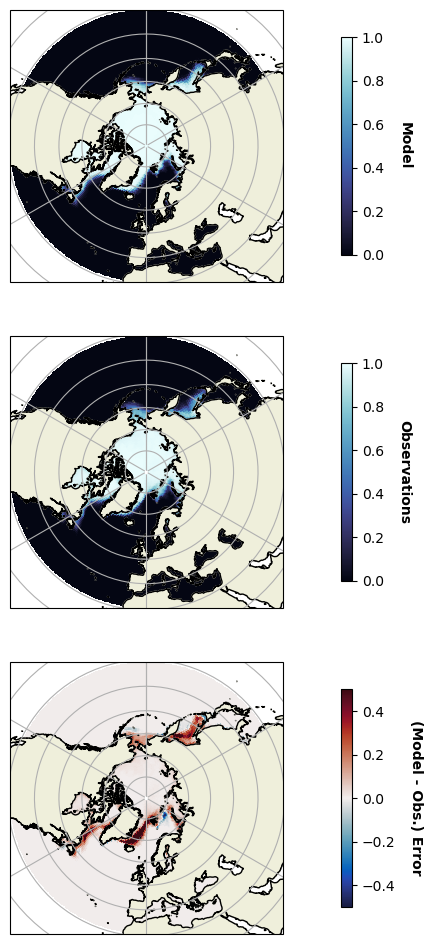

In [4]:
mv.plot_siconc_error(sic_name='siconc',
                     obs_name='NSIDC',
                     region='arctic',
                     time_bounds=slice('2001-01', '2020-12'),
                     figsize=(15,12),
                     freq='mar',
                     regrid_to='model',
                     method='bilinear',
                     source_plots=True,
                     stats=True,
                     )

#### **Results of our Validation Workflow**

In addition to the plot shown above, calling the ``plot_sic_error()`` method has populated the ``.obs``, ``.results`` and ``.stats`` attributes with the results of our validation workflow.

Let's start by exploring the observational data which has been added to the ``.obs`` attribute. 

Here, we can see that a new DataArray ``siconc_nsidc`` has been added to the observations dataset as a result of regridding the NSIDC (2001-2020) climatology onto our original model grid using bilinear interpolation (shown in panel (b) above).

In [5]:
mv.obs

<xarray.Dataset> Size: 838kB
Dimensions:             (y: 97, x: 360)
Coordinates:
    band_nsidc          int64 8B 1
    spatial_ref_nsidc   int64 8B 0
    lat_nsidc           (y, x) float64 279kB 30.86 30.86 30.86 ... 50.23 50.01
    lon_nsidc           (y, x) float64 279kB 73.5 74.5 75.5 ... 72.96 72.99
    time_counter_nsidc  float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    siconc_nsidc        (y, x) float64 279kB dask.array<chunksize=(97, 360), meta=np.ndarray>

We can see that the model - observation SIC error (``siconc_error`` shown in panel (c) above) has been included alongside the original ocean model SIC ``siconc`` in the ``.results`` attribute.

In [6]:
mv.results

<xarray.Dataset> Size: 978kB
Dimensions:       (obs: 1, y: 97, x: 360)
Coordinates:
  * obs           (obs) object 8B 'NSIDC'
    lat           (y, x) float64 279kB 30.86 30.86 30.86 ... 50.51 50.23 50.01
    lon           (y, x) float64 279kB 73.5 74.5 75.5 76.5 ... 72.95 72.96 72.99
    time_counter  float32 4B 0.0
    band          int64 8B 1
    spatial_ref   int64 8B 0
Dimensions without coordinates: y, x
Data variables:
    siconc_error  (obs, y, x) float64 279kB dask.array<chunksize=(1, 97, 360), meta=np.ndarray>
    siconc        (y, x) float32 140kB dask.array<chunksize=(97, 360), meta=np.ndarray>

Finally, we can also compute the aggregate statistics quantifying the error between our ocean model & the NSIDC SIC climatology by calling ``.compute()`` on the ``.stats`` attribute.

In [7]:
mv.stats.compute()

<xarray.Dataset> Size: 44B
Dimensions:                 ()
Coordinates:
    time_counter            float32 4B 0.0
    band                    int64 8B 1
    spatial_ref             int64 8B 0
Data variables:
    Mean Absolute Error     float64 8B 0.03282
    Mean Square Error       float64 8B 0.01041
    Root Mean Square Error  float64 8B 0.102

#### **Validation Without Visualisation**

To perform an Antarctic SIC validation workflow without visualising the results, we can alternatively use the ``.compute_sic_error()`` method, which returns all of the results discussed above without the matplotlib axes object.

To demonstrate this method, we will create a new ``ModelValidator`` object using our ocean model dataset and perform a September (minimum) SIC validation workflow as follows... 

In [8]:
mv.compute_siconc_error(sic_name='siconc',
                        obs_name='NSIDC',
                        region='antarctic',
                        time_bounds=slice('2001-01', '2020-12'),
                        freq='sep',
                        regrid_to='model',
                        method='bilinear',
                        stats=True,
                        )

/dssgfs01/working/otooth/Diagnostics/ValidOcean/ValidOcean/processing.py:208: RuntimeWarning: [longitude: -180.0, 180.0; latitude: -86.0, 90.0] bounds are outside the range of available observations data [longitude: -179.81810924750283, 179.81810924750283; latitude: -89.83681599961737, -39.36486911321109].
  warnings.warn(warning_message, RuntimeWarning)
/dssgfs01/working/otooth/Diagnostics/ValidOcean/ValidOcean/processing.py:208: RuntimeWarning: [longitude: -180.0, 180.0; latitude: -90.0, -39.0] bounds are outside the range of available model data [longitude: -179.99653278676575, 179.99031297181477; latitude: -85.78874492732504, 89.7417689202141].
  warnings.warn(warning_message, RuntimeWarning)



<ModelValidator>

-- Model Data --

<xarray.Dataset> Size: 281MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB -84.21 -84.21 -84.21 ... 50.23 50.01
    lon            (y, x) float64 953kB 73.5 74.5 75.5 ... 72.95 72.96 72.99
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    siconc         (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>

-- Observations --

<xarray.Dataset> Size: 1MB
Dimensions:             (y: 129, x: 360)
Coordinates:
    band_nsidc          int64 8B 1
    spatial_ref_nsidc   int64 8B 0
    lat_nsidc           (y, x) float64 372kB -84.21 -84.21 ... -39.45 -39.45
    lon_nsidc           (y, x

If we did want to visualise the results of our validation workflow, we could modify our previous example of the ``plot_siconc_error`` method as follows..

/dssgfs01/working/otooth/Diagnostics/ValidOcean/ValidOcean/processing.py:208: RuntimeWarning: [longitude: -180.0, 180.0; latitude: -86.0, 90.0] bounds are outside the range of available observations data [longitude: -179.81810924750283, 179.81810924750283; latitude: -89.83681599961737, -39.36486911321109].
  warnings.warn(warning_message, RuntimeWarning)
/dssgfs01/working/otooth/Diagnostics/ValidOcean/ValidOcean/processing.py:208: RuntimeWarning: [longitude: -180.0, 180.0; latitude: -90.0, -39.0] bounds are outside the range of available model data [longitude: -179.99653278676575, 179.99031297181477; latitude: -85.78874492732504, 89.7417689202141].
  warnings.warn(warning_message, RuntimeWarning)


array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object)

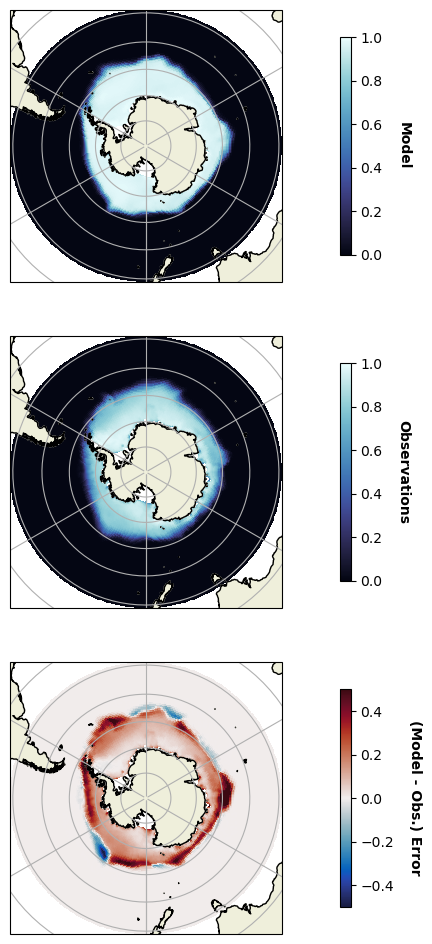

In [9]:
mv.plot_siconc_error(sic_name='siconc',
                     obs_name='NSIDC',
                     region='antarctic',
                     time_bounds=slice('2001-01', '2020-12'),
                     figsize=(15,12),
                     freq='sep',
                     regrid_to='model',
                     method='bilinear',
                     source_plots=True,
                     stats=True,
                     )

#### **Validating Aggregated Diagnostics**

So far, we have seen how to calculate and visualise biases between 2-dimensional ocean model outputs and observations. However, we often would like to validate an aggregated diagnostic calculated from a multi-dimensional field; for example, total sea ice area calculated from the sea ice concentration field.

To validate an aggregated diagnostic, we can define a workflow in several stages:

1. **Select & load our sea ice observation dataset**

- We will use the Arctic sea ice area diagnostic calculated from the National Snow & Ice Data Centre (NSIDC) Sea Ice Index version 3 product (2001-2020).

2. **Load & subset our ocean model dataset**

- Both a spatial & temporal subsetting is needed to match the observations since NSIDC has only regional coverage.

3. **Calculate the sea ice area from our ocean model dataset.**

4. **Calculate aggregated statistics**

- We return the MAE, MSE and RMSE.

5. **Plot the sea ice area time series**

As highlighted above, the true value of ValidOcean is that all of the steps are perfomed for you by using the **plot_sic_error()** method of the ModelValidator...

In [10]:
# Define model grid cell area:
ds_siconc['areacello'] = ds_domain['e1t'].squeeze() * ds_domain['e2t'].squeeze()

# Creating a new ModelValidator object:
mv = ModelValidator(mdl_data=ds_siconc)
mv


<ModelValidator>

-- Model Data --

<xarray.Dataset> Size: 282MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB -84.21 -84.21 -84.21 ... 50.23 50.01
    lon            (y, x) float64 953kB 73.5 74.5 75.5 ... 72.95 72.96 72.99
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    siconc         (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    areacello      (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>

-- Observations --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Results --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Stats -

In [11]:
mv.compute_siarea_timeseries(sic_name='siconc',
                             area_name='areacello',
                             obs_name='NSIDC',
                             region='arctic',
                             time_bounds=slice('2001-01', '2020-12'),
                             stats=True,
                             )


<ModelValidator>

-- Model Data --

<xarray.Dataset> Size: 282MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB -84.21 -84.21 -84.21 ... 50.23 50.01
    lon            (y, x) float64 953kB 73.5 74.5 75.5 ... 72.95 72.96 72.99
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    siconc         (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    areacello      (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>

-- Observations --

<xarray.Dataset> Size: 4kB
Dimensions:            (time_nsidc: 240)
Coordinates:
    band_nsidc         int64 8B ...
    spatial_ref_nsidc  int64 8B ...
  * time_nsidc

<Axes: xlabel='Time', ylabel='Sea Ice Area (km$^2$)'>

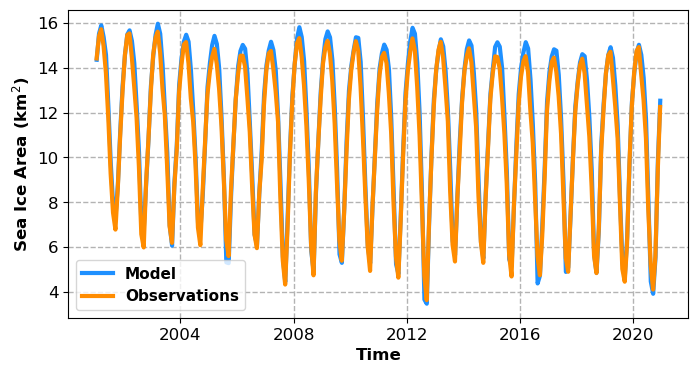

In [12]:
mv.plot_siarea_timeseries(sic_name='siconc',
                          area_name='areacello',
                          obs_name='NSIDC',
                          region='arctic',
                          time_bounds=slice('2001-01', '2020-12'),
                          figsize=(8,4),
                          plot_kwargs={'linewidth':3},
                          stats=True,
                          )

#### **Next Steps...**

In this tutorial, we have seen how to perform two typical ocean model validation worfklows for sea ice data using the ModelValidator object.

Next, we will explore how to use the ModelValidator to load ocean observations datasets in the **ex4_ocean_observations.ipynb** notebook.